# Práctica 6 - Operaciones Aritméticas y Lógicas en Imágenes Médicas

## Carga de imágenes
En esta sección se cargan las tres imágenes médicas utilizando OpenCV en escala de grises. También se visualizan para confirmar que se hayan leído correctamente.

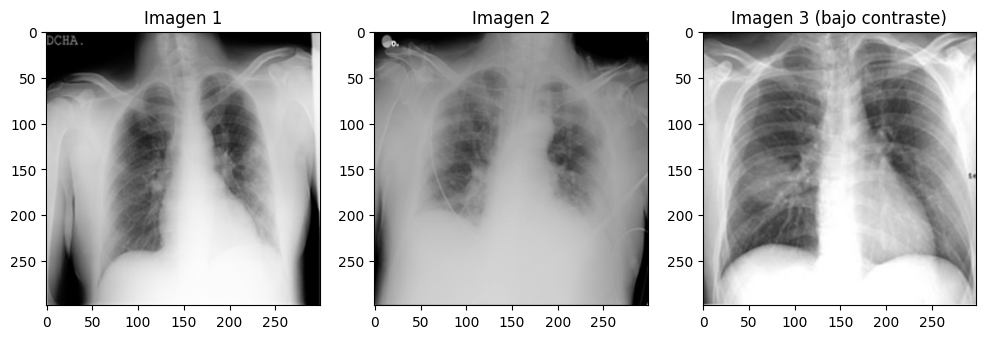

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('img1.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('img2.png', cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('img3.png', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(img1, cmap='gray'); plt.title("Imagen 1")
plt.subplot(1,3,2); plt.imshow(img2, cmap='gray'); plt.title("Imagen 2")
plt.subplot(1,3,3); plt.imshow(img3, cmap='gray'); plt.title("Imagen 3 (bajo contraste)")
plt.show()

## Suma de imágenes

## Suma de imágenes
Aquí se realiza la suma ponderada de dos imágenes médicas usando diferentes pesos. Esta técnica permite fusionar información de distintas modalidades. También se calcula la suma promedio.

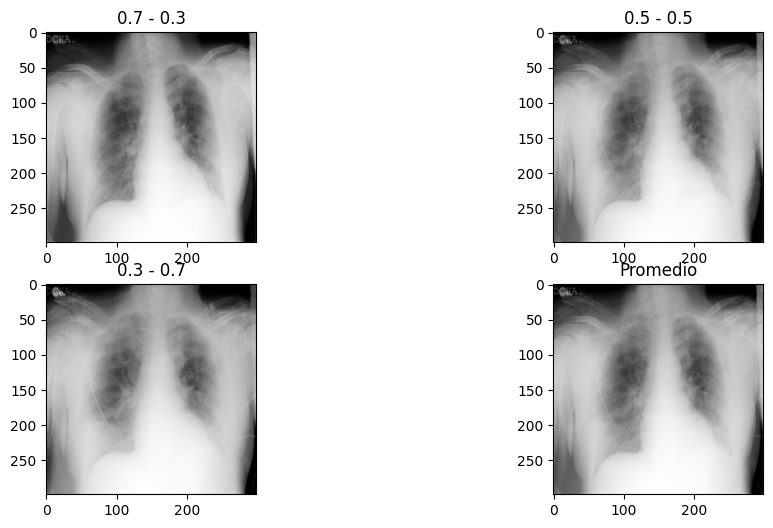

In [2]:
w1 = cv2.addWeighted(img1, 0.7, img2, 0.3, 0)
w2 = cv2.addWeighted(img1, 0.5, img2, 0.5, 0)
w3 = cv2.addWeighted(img1, 0.3, img2, 0.7, 0)
prom = (img1/2 + img2/2).astype(np.uint8)

titles = ["0.7 - 0.3", "0.5 - 0.5", "0.3 - 0.7", "Promedio"]
imgs = [w1, w2, w3, prom]

plt.figure(figsize=(12,6))
for i,(t,im) in enumerate(zip(titles, imgs)):
    plt.subplot(2,2,i+1); plt.imshow(im, cmap='gray'); plt.title(t)
plt.show()

## Resta de imágenes

## Resta de imágenes
La resta permite identificar diferencias entre dos estudios médicos. Se realiza tanto la resta directa como la resta absoluta para evitar valores negativos.

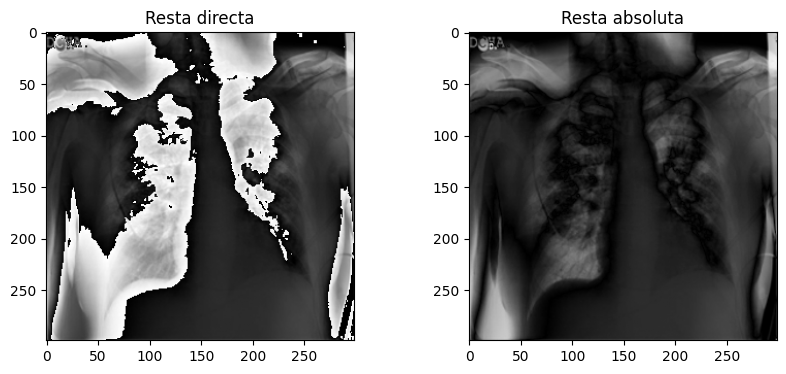

In [3]:
resta = img1 - img2
absd = cv2.absdiff(img1, img2)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(resta, cmap='gray'); plt.title("Resta directa")
plt.subplot(1,2,2); plt.imshow(absd, cmap='gray'); plt.title("Resta absoluta")
plt.show()

## Multiplicación por un factor

## Multiplicación por factor
En este ejercicio se modifica el brillo de la imagen aplicando factores multiplicativos. Se observan los efectos de oscurecimiento y aclarado.

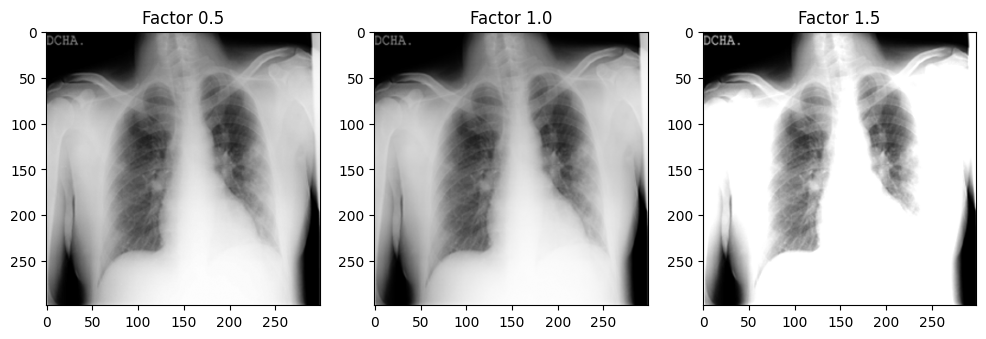

In [4]:
factors = [0.5, 1.0, 1.5]
plt.figure(figsize=(12,4))
for i,f in enumerate(factors):
    res = np.clip(img1 * f, 0, 255).astype(np.uint8)
    plt.subplot(1,3,i+1); plt.imshow(res, cmap='gray'); plt.title(f"Factor {f}")
plt.show()

## Multiplicación píxel a píxel

## Multiplicación píxel a píxel
Esta operación multiplica las dos imágenes elemento por elemento. Se usa comúnmente para aplicar máscaras o resaltar regiones específicas.

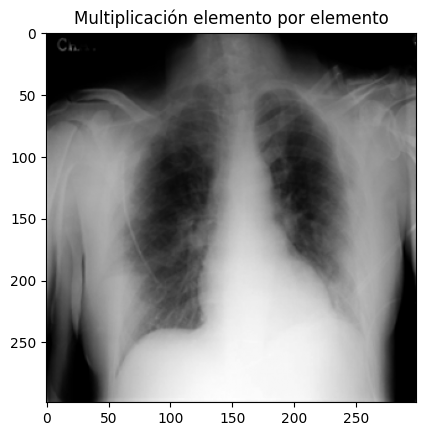

In [5]:
mult = cv2.normalize(img1.astype('float32') * img2.astype('float32'),
                       None, 0,255, cv2.NORM_MINMAX).astype(np.uint8)

plt.imshow(mult, cmap='gray'); plt.title("Multiplicación elemento por elemento")
plt.show()

## Ecualización de histograma

## Ecualización de histograma
Se toma la imagen de bajo contraste y se le aplica ecualización para mejorar la distribución tonal y resaltar detalles. También se comparan los histogramas.

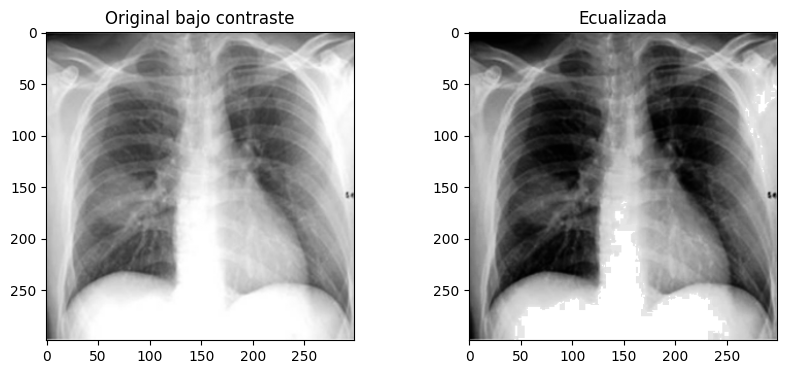

/tmp/ipython-input-3359267365.py:9: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(1,2,1); plt.hist(img3.ravel(), 256, [0,256]); plt.title("Histograma original")
/tmp/ipython-input-3359267365.py:10: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(1,2,2); plt.hist(equ.ravel(), 256, [0,256]); plt.title("Histograma ecualizado")


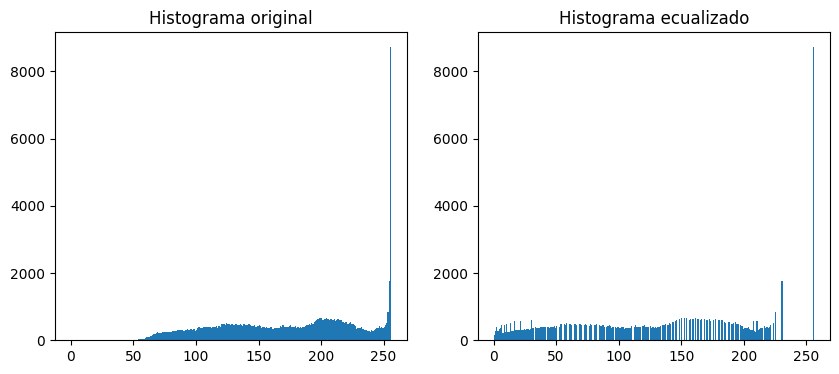

In [6]:
equ = cv2.equalizeHist(img3)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img3, cmap='gray'); plt.title("Original bajo contraste")
plt.subplot(1,2,2); plt.imshow(equ, cmap='gray'); plt.title("Ecualizada")
plt.show()

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.hist(img3.ravel(), 256, [0,256]); plt.title("Histograma original")
plt.subplot(1,2,2); plt.hist(equ.ravel(), 256, [0,256]); plt.title("Histograma ecualizado")
plt.show()